# 统计学习方法——k近邻法（kNN）

k近邻法常用来处理分类问题（多分类），有时也能够用来处理回归问题。

假设给定一个训练数据集，其中每个实例样本的类别已经确定，此时有一个新的实例输入，需要判断其类别，这就是一个分类问题。

而kNN算法则根据新输入的实例距离最近的k个训练实例预测（判断）其类别。

这里以鸢尾花数据集为例，用python代码说明此问题：

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#获取数据
iris = datasets.load_iris()
print('鸢尾花类型有：',iris.target_names)
print('鸢尾花数据集包括的特征有：',iris.feature_names)

鸢尾花类型有： ['setosa' 'versicolor' 'virginica']
鸢尾花数据集包括的特征有： ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


 为方便可视化，对数据进行预处理，主要包括：
 
 1. 只选两类花的数据，即'setosa'和'versicolor'
 
 2. 只选两个特征，即'sepal length (cm)'和'sepal width (cm)

In [3]:
# 获取y数据，筛选出0和1
iris_Y = iris.target
iris_sub_Y = iris_Y[iris_Y != 2]
# 获取x数据，筛选出y维0或1的x
iris_X = iris.data
iris_sub_X = iris_X[iris_Y != 2][:,0:2]

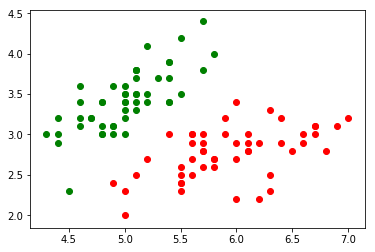

In [4]:
#绘制散点图 'setosa'为绿色 'versicolor' 为红色，'sepal length (cm)'为x轴，'sepal width (cm)为y轴绘图
plt.scatter(iris_sub_X[iris_sub_Y == 0, 0], iris_sub_X[iris_sub_Y == 0, 1], color = 'g')
plt.scatter(iris_sub_X[iris_sub_Y == 1, 0], iris_sub_X[iris_sub_Y == 1, 1], color = 'r')

此时，如果有一个新的样本（蓝色），'sepal length (cm)'和'sepal width (cm)'分别为5.4cm和3.2cm，如何判断其实是'setosa'为绿色还是 'versicolor' 为红色

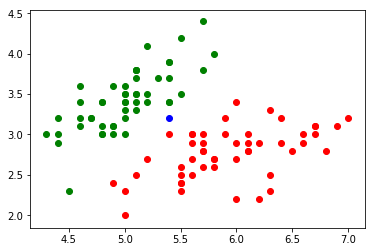

In [5]:
plt.scatter(iris_sub_X[iris_sub_Y == 0, 0], iris_sub_X[iris_sub_Y == 0, 1], color = 'g')
plt.scatter(iris_sub_X[iris_sub_Y == 1, 0], iris_sub_X[iris_sub_Y == 1, 1], color = 'r')
plt.scatter(5.4, 3.2, color = 'b')

kNN的思想是，找与样本点距离最近的k个样本，然后根据他们的类型判断样本的类型

最简单的方法就是计算这个新样本与数据集的距离

In [6]:
x = [5.4, 3.2]
distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in iris_sub_X]

然后根据计算的距离找到最近的k个样本的类型，取k=5

In [7]:
nearest = np.argsort(distances)
k = 5
topK_y = [iris_sub_Y[i] for i in nearest[:k]]
topK_y

[0, 0, 1, 1, 1]

所以我们发现最近的k=5个样本中，有2个'setosa'，3个 'versicolor'。

然后可以根据出现频率最高的类型判断样本类型

In [8]:
from collections import Counter
Counter(topK_y).most_common(1)[0][0]

1

## 注意：

kNN法需要考虑量刚的问题，例如：某一维度是1000级（1000，1001，998），而另一维是10级（10，12，7），这样前一维度在计算距离时候可能就会站比较大的影响。

## 拓展：

1. 这里计算新样本点与测试数据集距离是默认采用了欧式距离，其实采用其他距离也是可以的；

2. k是超参数，需要通过调试进行选择。k如果选得太大则没有意义（例如：极端的k等于样本数量），而k取太小会受随机因素的影响（例如：极端的k=1，则最近一个样本的误差直接会导致结果的问题）；

3. 最后的根据频率选择，其实也可以根据其他的方式，例如距离作为权重计算加权和，此时k近邻法就是一个回归问题了。

距离度量：

1. $L_{p}$距离也叫 Minkowski 距离：$L_{p}(x_{i}, x_{j}) = (\sum_{l=1}^{n}|x_{i}^{(l)} - x_{j}^{(l)}|^{p})^{\frac{1}{p}})$ 
2. p=2时，就是欧式距离
3. p=1时，称为曼哈顿距离
4. $p=\infty $，即$L_{\infty}(x_{i}, x_{j})=max_{l}| x_{i}^{(l)} - x_{j}^{(l)} |$

## kd树

上面方法虽然可以解决，kNN的问题，而且从思想上来说比较简单易懂。

但是，我们还需考虑到计算机计算量的问题， 如果样本很多，且样本的特征也很多，则上述方法计算效率很低，不适合大规模数据的应用。

kd树则很好得解决了这个问题。

kd树主要分为两步：1、构造kd树；2、搜索kd树。

### 构建kd树

一个简单例子，构造kd树，假设数据集为：$T = \{ (2, 3)^T,   (5, 4)^T,   (9, 6)^T,   (4, 7)^T,   (8, 1)^T,   (7, 2)^T \}$

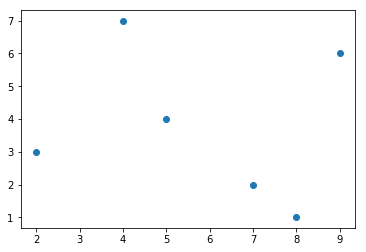

In [9]:
a = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
plt.scatter(x=a[:,0], y=a[:,1])

首先计算第一维数据的中位数（注：在统计学的前沿文献中一般定义分位数$\mathscr{t}_{p} = inf(x: P(X <= x)>=p)$）,采用这种方法计算中位数上述例子的结果是7，而一般的简单计算中位数遇到偶数个数据采用中间两个的均值处理）

In [10]:
np.median(a[:,0])

6.0

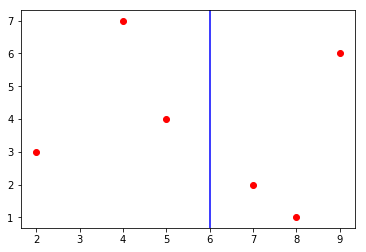

In [11]:
a = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
plt.scatter(x=a[:,0], y=a[:,1], color='r')
plt.axvline(6, color='b')

这样上面的6个点就被分成了两组$T_{x1<6} = \{ (2, 3)^T,   (5, 4)^T,  (4, 7)^T \}$和$T_{x2>6} = \{  (9, 6)^T,   (8, 1)^T,   (7, 2)^T \}$。

接下啦，分别对这两组数据根据第二维分别计算中位数，然后进行划分

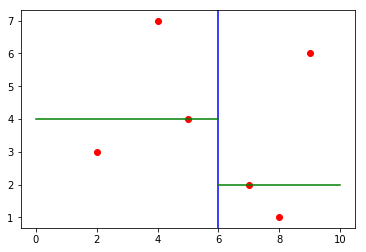

In [12]:
a = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
plt.scatter(x=a[:,0], y=a[:,1], color='r')
plt.axvline(6, color='b')
plt.plot([0,6], [4,4], color='g')
plt.plot([6,10], [2,2], color='g')

然后，在上一维划分的基础上，再对下一维度进行划分（如果没有下一维则回到第一维，一般要求垂直即可，在kd树中采用深度对特征维数取余数的方法），直到分尽为止。

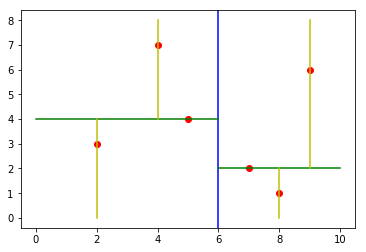

In [13]:
a = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
plt.scatter(x=a[:,0], y=a[:,1], color='r')
plt.axvline(6, color='b')
plt.plot([0,6], [4,4], color='g')
plt.plot([6,10], [2,2], color='g')
plt.plot([4,4], [4,8], color='y')
plt.plot([2,2], [0,4], color='y')
plt.plot([8,8], [0,2], color='y')
plt.plot([9,9], [2,8], color='y')

## kd树构建python实现

首先，构建测试数据集，假设样本有100个，每个样本有10个特征

In [14]:
ndata = 100
ndim = 10
data = 10 * np.random.rand(ndata * ndim).reshape((ndata,ndim))
data.shape

(100, 10)

因为树的每个节点其实是一个if-then的条件判断，同时kd树是一个二叉树。所以在每个节点需要给出每个分支的条件。因此，需要构建一个array存储令为hrect。

hrect为2行10列（列数同特征数），其中第一行为进入该节点的数据每个特征的最小值，第二行为最大值。

In [15]:
hrect = np.zeros((2, ndim))
hrect[0,:] = data.min()
hrect[1,:] = data.max()

首先以第一维数据的中位数对data进行分割

In [16]:
idx = np.argsort(data[:,0], kind='mergesort') #获取第一维数据的序号
data = data[idx,:] #对data进行从小到大排序
splitval = data[int(ndata/2),0] #获取第一维数据的分割点，也就是中位数

left_hrect = hrect.copy()
left_hrect[1,0] = splitval #左分支的条件
right_hrect = hrect.copy()
right_hrect[0,0] = splitval #右分支条件

构建数，树在python中用list表示，list的每个元素表示树的节点用tuple表示。

每个tuple包含的该节点的基本信息，包括：该节点下数据（样本）的索引（只有当节点是叶节点时才会有，否则维None），该节点下的数据（样本）（也只有是叶节点才会有，否则维None），该节点左分支的条件（只有不是叶节点才有，叶节点为None），该节点右分支的条件（只有不是叶节点才有，叶节点为None），以及该节点左分支下一个节点在树中的索引和右分支下一个节点在树中的索引。

同时还需要构建一个list令为stack，用于存储还需要进行再分的数据。该list的每个元素也是一个tuple。

该tuple包含：需要处理的数据和他们的索引，当前节点深度，父节点深度，左分支还是右分支（这里用布尔值，左分支为True）

In [17]:
tree = [(None, None, left_hrect, right_hrect, None, None)]
stack = [(data[:int(ndata/2),:], idx[:int(ndata/2)], 1, 0, True),
        (data[int(ndata/2):,:], idx[int(ndata/2):], 1, 0, False),]

接下来，进入下一层，对数据进行分类，首先从stack获取数据，因为stack用来存储需要分类的数据，同时非空list的布尔值为True，那么可以通过 while stack进行循环，每次循环通过pop截取list中最后一项，产生新数据时再通过append，即可。

In [18]:
data, didx, depth, parent, leftbranch = stack.pop() # 更新数据，分别用data，didx，depth，parent，leftbranch表示当前循环需要处理的数据，以及他们的索引，深度、父节点在tree中的索引，是不是左分支等
ndata = data.shape[0] #当前数据样本个数
nodeptr = len(tree) #当前树的深度。

下面对上一层树进行更新，更新的目的，是要告诉父节点它的左（或右）节点在tree这个list中的位置。

In [19]:
_didx, _data, _left_hrect, _right_hrect, left, right = tree[parent] #先获取父节点数据
tree[parent] = (_didx, _data, _left_hrect, _right_hrect, nodeptr, right) if leftbranch else (_didx, _data, _left_hrect, _right_hrect, left, nodeptr) #告诉父节点它的左或右分支在tree的位置

接下来，判断当前的节点是不是叶节点，也就是数据是否还需要再分。

首先设置一个**叶节点最大样本数量的限制变量**

In [20]:
leafsize = 10

如果当前节点数据样本树少于 leafsize，则无需再分，只需要对tree新增一个叶节点即可，stack不需要改变

In [21]:
if ndata <= leafsize:
    _didx = didx.copy()
    _data = data.copy()
    leaf = (_didx, _data, None, None, 0, 0) #叶节点不需要再判断条件也没有左右分支，所以分别取为None和0
    tree.append(leaf)

**否则**，还需要对数据进行再分，对第几维特征进行划分（前面讲过为：深度相对于特征总维数的余），然后进行排序划分，更新stack（因为此时不是叶节点，还有下一级节点）

In [22]:
splitdim = depth % ndim #对第几维进行划分
idx = np.argsort(data[:, splitdim], kind='mergesort') #获取splitdim的排序序号
data[:, :] = data[idx, :] #对data进行从小到大排序
didx = didx[idx] #对上一级节点传递下来的数据索引也要排序，保证最后能找到所有样本原来的位置
nodeptr = len(tree) #nodeptr保存在tree中，表示节点在tree中的位置，这也要存储到stack中，在下一次处理时候才能够找到父节点
stack.append((data[:int(ndata/2), :], didx[:int(ndata/2)], depth+1, nodeptr, True))
stack.append((data[int(ndata/2):, :], didx[int(ndata/2):], depth+1, nodeptr, False))

下面还要对tree进行更新

In [23]:
splitval = data[int(ndata/2), splitdim]
if leftbranch:
    left_hrect = _left_hrect.copy()
    right_hrect = _right_hrect.copy()
else:
    left_hrect = _right_hrect.copy()
    right_hrect = _right_hrect.copy()
left_hrect[1, splitdim] = splitval
right_hrect[0, splitdim] = splitval
tree.append((None, None, left_hrect, right_hrect, None, None))

完整定义函数code：

In [24]:
def kdtree(data, leafsize= 10):
    ndata = data.shape[0]
    ndim = data.shape[1]

    hrect = np.zeros((2, ndim))
    hrect[0,:] = data.min()
    hrect[1,:] = data.max()

    idx = np.argsort(data[:,0], kind='mergesort') #获取第一维数据的序号
    data = data[idx,:] #对data进行从小到大排序
    splitval = data[int(ndata/2),0] #获取第一维数据的分割点，也就是中位数

    left_hrect = hrect.copy()
    left_hrect[1,0] = splitval #左分支的条件
    right_hrect = hrect.copy()
    right_hrect[0,0] = splitval #右分支条件

    tree = [(None, None, left_hrect, right_hrect, None, None)]
    stack = [(data[:int(ndata/2),:], idx[:int(ndata/2)], 1, 0, True),(data[int(ndata/2):,:], idx[int(ndata/2):], 1, 0, False),]
    
    while stack:
        data, didx, depth, parent, leftbranch = stack.pop() # 更新数据，分别用data，didx，depth，parent，leftbranch表示当前循环需要处理的数据，以及他们的索引，深度、父节点在tree中的索引，是不是左分支等
        ndata = data.shape[0] #当前数据样本个数
        nodeptr = len(tree) #当前树的深度。

        _didx, _data, _left_hrect, _right_hrect, left, right = tree[parent] #先获取父节点数据
        tree[parent] = (_didx, _data, _left_hrect, _right_hrect, nodeptr, right) if leftbranch else (_didx, _data, _left_hrect, _right_hrect, left, nodeptr) #告诉父节点它的左或右分支在tree的位置

        if ndata <= leafsize:
            _didx = didx.copy()
            _data = data.copy()
            leaf = (_didx, _data, None, None, 0, 0) #叶节点不需要再判断条件也没有左右分支，所以分别取为None和0
            tree.append(leaf)
        else:
            splitdim = depth % ndim #对第几维进行划分
            idx = np.argsort(data[:, splitdim], kind='mergesort') #获取splitdim的排序序号
            data[:, :] = data[idx, :] #对data进行从小到大排序
            didx = didx[idx] #对上一级节点传递下来的数据索引也要排序，保证最后能找到所有样本原来的位置
            nodeptr = len(tree) #nodeptr保存在tree中，表示节点在tree中的位置，这也要存储到stack中，在下一次处理时候才能够找到父节点
            stack.append((data[:int(ndata/2), :], didx[:int(ndata/2)], depth+1, nodeptr, True))
            stack.append((data[int(ndata/2):, :], didx[int(ndata/2):], depth+1, nodeptr, False))

            splitval = data[int(ndata/2), splitdim]
            if leftbranch:
                left_hrect = _left_hrect.copy()
                right_hrect = _right_hrect.copy()
            else:
                left_hrect = _right_hrect.copy()
                right_hrect = _right_hrect.copy()
            left_hrect[1, splitdim] = splitval
            right_hrect[0, splitdim] = splitval
            tree.append((None, None, left_hrect, right_hrect, None, None))
    return tree

### 搜索kd树

上面已经完成了对kd树的构建，此时如果有一个新的样本，如何寻找跟其距离最近的k个点呢？

1. 找到该新样本所在的叶节点：从根节点出发，递归逐级向下寻找，直到子节点为叶节点为止。

2. 以此节点为“当前最近点”。

3. 再递归向上寻找，在每个节点：首先，如果该节点保存的实例点比当前最近距离更近，则以该实例点为‘最近点’；如果存在“新的最近点”则其一定是在该节点的一个子节点内（检查该子节点的区域是否与以目标点为圆心，以“当前最近距离”为半径的球相交）；如果相交则在该子节点内可能存在距离目标更近的点，移动到该节点再进行搜索。

4. 直到搜索到根节点为止。

## 搜索kd树的python实现

这里我们参考scipy提供的kd树搜索代码，对上述代码略作修改，从树根向节点进行搜索。其实方法是大同小异的。

首先通过上面的代码构建一个kd树tree，一个测试数据datapoint和K

In [77]:
tree = kdtree(data)
ntest = 1
datapoint = 10 * np.random.rand(ntest * ndim).reshape((ntest,ndim))
K = 3

首先同样通过stack来存储需要处理的节点，knn用来存储最近的K个点到测试点的距离（按从小到大排，默认无穷的）,_datapt为一个测试样本

In [78]:
stack = [tree[0]]
knn = [(np.inf, None)] * K
_datapt = datapoint[0, :]

同样的，每次对stack进行结尾，然后对当前节点进行处理。

In [84]:
leaf_idx, leaf_data, left_hrect, right_hrect, left, right = stack.pop()

因为我们知道在构建kd tree的时候，对于叶节点来说leaf_idx和leaf_data非空，而中间节点left_hrect和right_hrect非空。所以可以根据根据 leaf_idx是否为None判断是不是叶节点。

如果不是叶节点，则判断当前节点的左右两个分支是否有可能存在比当前最近的K个点更近的点。

In [47]:
#定义一个判断中间节点的分支内是否有更近的点存在，其实计算的是测试数据与该分支的条件（范围）的距离，所以只需要计算不在该范围内的特征所产生的距离。
#其中hrect表示分支的条件，r2表示要成为最近的K个点之一的最大距离，centroid表示中心（也就是测试数据）
def intersect(hrect, r2, centroid):
    maxval = hrect[1, :] #获取该分支各特征的最大值
    minval = hrect[0, :] #各特征的最小值
    # 设置一个参数p，p在大部分特征与测试数据相同，只有当该特征的数据不在这范围内时才与centroid不同
    p = centroid.copy() 
    idx = p < minval 
    p[idx] = minval[idx]
    idx = p > maxval
    p[idx] = maxval[idx]
    return ((p-centroid)**2).sum() < r2 #计算距离

因为在每个中间节点都存在左右两个分支，所以都需要判断一下，然后根据判断结果True or False对节点的下一层是否还需要进行搜索

In [52]:
if intersect(left_hrect, knn[-1][0], _datapt):
    stack.append(tree[left])
if intersect(right_hrect, knn[-1][0], _datapt):
    stack.append(tree[right])

如果是叶节点，则计算

In [28]:
#定义一个函数计算叶节点中数据与测试数据的距离，并判断是否小于“当前最小距离”中的任意一个。
#其中data表示测试数据，lidx和ldata表示该叶节点上的数据及其索引。
def quadratic_knn_search(data, lidx, ldata, K):
    ndata = ldata.shape[0]
    param = ldata.shape[1]
    K = K if K < ndata else ndata
    retval = []
    sqd = ((ldata - data)**2).sum(axis=1)
    idx = np.argsort(sqd, kind='mergesort')
    idx = idx[:K]
    return zip(sqd[idx], lidx[idx])

完整的搜索kd树代码如下：

In [95]:
def quadratic_knn_search(data, lidx, ldata, K):
    ndata = ldata.shape[0]
    param = ldata.shape[1]
    K = K if K < ndata else ndata
    retval = []
    sqd = ((ldata - data)**2).sum(axis=1)
    idx = np.argsort(sqd, kind='mergesort')
    idx = idx[:K]
    return zip(sqd[idx], lidx[idx])

def intersect(hrect, r2, centroid):
    maxval = hrect[1, :] #获取该分支各特征的最大值
    minval = hrect[0, :] #各特征的最小值
    # 设置一个参数p，p在大部分特征与测试数据相同，只有当该特征的数据不在这范围内时才与centroid不同
    p = centroid.copy() 
    idx = p < minval 
    p[idx] = minval[idx]
    idx = p > maxval
    p[idx] = maxval[idx]
    return ((p-centroid)**2).sum() < r2 #计算距离

def search_kdtree(tree, datapoint, K):
    stack = [tree[0]]
    knn = [(np.inf, None)] * K
    _datapt = datapoint[0, :]
    while stack:
        leaf_idx, leaf_data, left_hrect, right_hrect, left, right = stack.pop()
        if leaf_idx is not None:
            _knn = quadratic_knn_search(datapoint, leaf_idx, leaf_data, K)
            if _knn[0][0] < knn[-1][0]:
                knn = sorted(knn + _knn)[:K]
        else:
            if intersect(left_hrect, knn[-1][0], _datapt):
                stack.append(tree[left])
            if intersect(right_hrect, knn[-1][0], _datapt):
                stack.append(tree[right])
    return knn